In [1]:
### Importing Relevant Libraries

# linear algebra
import numpy as np 

# Data processing
import pandas as pd 

# Algorithms and Metric
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import roc_auc_score

# Data Visualization 
from matplotlib import pyplot as plt

In [2]:
### Importing the Data 
all_data = pd.read_table("DScasestudy.txt")

In [ ]:
'''
Exploration of the Data:

After importing the data, I looked at the necessary information about the data. The data comprised of 530 rows
of observations, 1 column of response variable and 16562 columns of features. With the very large number of features
compared to the number of observation, it is imperative that I look deeper into the features and see if there are 
ways to reduce the number of features so that the model does not suffer from overfitting.
 
Next, I looked at the different statistics for each feature and the response to have a deeper and clearer 
understanding of the data. I immediately noticed that some of the features in the data have the same value for all 
the observations. This implies that with proper feature selection methods, the features can be reduced.
'''

In [3]:
all_data.info() # data type, memory information and index 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Columns: 16563 entries, response to V16562
dtypes: int64(16563)
memory usage: 67.0 MB


In [4]:
all_data.head()

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
all_data.describe()  # data description

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
count,530.000000,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000,530.000000,530.0,...,530.000000,530.0,530.0,530.000000,530.000000,530.000000,530.0,530.000000,530.0,530.000000
mean,0.232075,0.009434,0.009434,0.001887,0.0,0.020755,1.0,0.001887,0.030189,0.0,...,0.158491,0.0,0.0,0.001887,0.020755,0.013208,0.0,0.003774,0.0,0.447170
std,0.422556,0.096761,0.096761,0.043437,0.0,0.142697,0.0,0.043437,0.171268,0.0,...,0.365545,0.0,0.0,0.043437,0.142697,0.114270,0.0,0.061371,0.0,0.497671
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.0,1.000000,1.000000,0.0,...,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,0.0,1.000000


In [6]:
dimm = all_data.shape
ro = 'In the original data, there are %d rows and %d columns.' %(dimm[0], dimm[1])
ro1 = 'Alternatively, there are %d observations and %d features.' %(dimm[0], dimm[1]-1)
print(ro)
print(ro1)

In the original data, there are 530 rows and 16563 columns.
Alternatively, there are 530 observations and 16562 features.


In [ ]:
'''
Data Cleaning:

Although uncommon, I started the data cleaning process by first checking, if available, any observation with a null
value as the response and I found none.
Next, I checked if there were null value(s) for any feature in any of the observations. Surprisingly, none was found.
This means that the data has no null value at all.

Next, I looked at the 'prior distribution' of classes. I found that there is class imbalance. specifically, just 
23 percent of the observations belong to the class with label '1'. With this discovery, it will be inappropriate to
employ 'accuracy' as the metric to measure the performance of the machine learning models. Reason being that if a 
particular classifier predicts only class '0', its accuracy will be 78 percent (null accuracy). Hence, I resolved 
to employ a better metric that will account for the inherent class imbalance in the data. Specifically, I made use 
of the Area Under Curve (AUC) of Receiver Operating Characteristic (ROC) to adjudge the performance of the models.
'''

In [7]:
all_data = all_data[np.isfinite(all_data['response'])] # drop all rows where the response is null (if applicable)
dimm1 = all_data.shape
ro2 = 'There are %d observations and %d features after checking for the presence of Null response.' %(dimm1[0], dimm1[1]-1)
print(ro2)

There are 530 observations and 16562 features after checking for the presence of Null response.


In [8]:
# Null check
def null_check(data):
    ind = np.sum(data.isnull().sum())
    if ind == 0:
        print('No Null value')
    else:
        print('There is/are Null value(s)')

null_check(all_data)

No Null value


In [9]:
## Class Imbalance
per_value = all_data['response'].sum()/all_data['response'].count() * 100
to1 = "Percentage of observations in class 1 is %d" %per_value 
print(to1,'%.', sep = '')


Percentage of observations in class 1 is 23%.


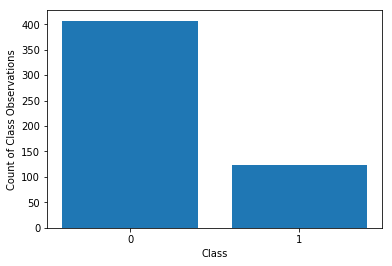

In [10]:
fig = plt.figure()
plt.bar(['0','1'], [all_data['response'].count() - all_data['response'].sum(), all_data['response'].sum()])
plt.xlabel('Class')
plt.ylabel('Count of Class Observations')
plt.show()

In [ ]:
'''
Because the percentage of class label 1 is 23%, the class is imbalance. I considered AUC-ROC curve as the metric
of interest.
'''

In [ ]:
'''
Feature Selection:

Selection of relevant features is inevitable in this kind of problem owing to the large number of features. However,
before such an operation, I split the data into training and test sets. Feature selection will be done on the training
set and the selected features will be used to transform/filter the two sets as. By doing the spliting before 
selection, overfitting will be avoided. As such, the data was split in the ratio 4:1 for the training and test sets,
respectively.
'''

In [11]:
train_X, test_X, train_y, test_y =train_test_split(all_data.drop(labels=['response'], axis=1),
                                                   all_data['response'],test_size=0.2,random_state = 55)

In [12]:
train_X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
356,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
460,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
479,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
per_train = train_y.sum()/train_y.count() * 100
to2 = "Percentage of observations in class 1 in the training set is %d" %per_train
print(to2,'%.', sep = '')

Percentage of observations in class 1 in the training set is 22%.


In [14]:
per_test = test_y.sum()/test_y.count() * 100
to3 = "Percentage of observations in class 1 in the test set is %d" %per_test
print(to3,'%.', sep = '')

Percentage of observations in class 1 in the test set is 27%.


In [ ]:
### Steps of Feature Selection

In [ ]:
'''
Removing constant features: 
Constant features are those features that have the same value in every observation in the training set. 
They do not vary among observations (i.e., their variance is 0).
They are removed as they do not contribute information to predicting the response variable. 
Here, all features with constant value 0 or 1 in all the observations were dropped.
''' 

In [15]:
constant_remover = VarianceThreshold(threshold=0) 
constant_remover.fit(train_X)
picked_columns = train_X.columns[constant_remover.get_support()]
print('%d features have constant values and will subsequently be removed from the training and the test sets.'
      %(len(train_X.columns) - len(picked_columns)))
train_X = constant_remover.transform(train_X)
test_X = constant_remover.transform(test_X)
train_X = pd.DataFrame(train_X, columns = picked_columns)
test_X = pd.DataFrame(test_X, columns = picked_columns)
print('Now, the dimension of the training set is', train_X.shape)
print('and the dimension of the test set is', test_X.shape)

6129 features have constant values and will subsequently be removed from the training and the test sets.
Now, the dimension of the training set is (424, 10433)
and the dimension of the test set is (106, 10433)


In [ ]:
'''
Removing quasi-constant features
Next, quasi-constant features will be removed. i.e., those below certain threshold of variance. These features do 
not vary much among the observations in the training set.
Feature that have variance below 0.01 were removed.
'''

In [16]:
qconstant_removal = VarianceThreshold(threshold=0.01) 
qconstant_removal.fit(train_X) 
picked_columns_quasi = train_X.columns[qconstant_removal.get_support()]
print('%d features have variance below 0.01 and will subsequently be removed from the training and the test sets.'
      %(len(train_X.columns) - len(picked_columns_quasi)))
train_X = qconstant_removal.transform(train_X)
test_X = qconstant_removal.transform(test_X)
train_X = pd.DataFrame(train_X, columns = picked_columns_quasi)
test_X = pd.DataFrame(test_X, columns = picked_columns_quasi)
print('Now, the dimension of training set is', train_X.shape)
print('and the dimension of test set is', test_X.shape)

3919 features have variance below 0.01 and will subsequently be removed from the training and the test sets.
Now, the dimension of training set is (424, 6514)
and the dimension of test set is (106, 6514)


In [ ]:
'''
Removing duplicate features and leaving one and only one 'copy'
Duplicate features are removed because having so many duplicates of a particular feature does not add any value 
to algorithm training. Rather, they add overhead and unnecessary delay to the training time.
'''

In [17]:
train_X = train_X.T.drop_duplicates(keep = 'first').T
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Columns: 6514 entries, V5 to V16562
dtypes: int64(6514)
memory usage: 21.1 MB


In [ ]:
## No duplicate features found

In [ ]:
'''
Looking at features that are highly correlated.
Next, looking at the remaining 6514 features to see if two or more than two of these features are highly 
correlated, i.e., if they are close together in the linear space. If such correlation occurs, it means they carry 
redundant information to the model to be trained. Only one of such correlated features would be retained.
Specifically, correlation between two features is computed. If the absolute value is greater than 0.8 (a relatively
high value considering that the maximum possible correlation value is 1), one of the features is dropped.
'''

In [18]:
corr_features_set = set()  
corr_matrix = train_X.corr()

for i in range(len(corr_matrix.columns)):  
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            col_name = corr_matrix.columns[i]
            corr_features_set.add(col_name)
            
print('%d features will be removed as a result of being correlated with other features in the training set.' 
      %len(corr_features_set))
train_X.drop(labels=corr_features_set, axis=1, inplace=True)  
test_X.drop(labels=corr_features_set, axis=1, inplace=True)
train_X.info()

65 features will be removed as a result of being correlated with other features in the training set.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Columns: 6449 entries, V5 to V16562
dtypes: int64(6449)
memory usage: 20.9 MB


In [ ]:
'''
From this point, two additional data preprocessing schemes were considered:
1. standardization, such that the mean of each feature will be centered at 0 and the variance will be unity.
  NB. Also, this will only be performed on the training set, but will be used to tranform both the training and the
      test sets. 
2. Feature extraction using the principal component analysis (PCA). This is done to further reduce the number of 
   features. Summarily, the new (reduced) features that were extracted from the original features are basically
  orthogonal or uncorrelated and they are linear combinations of the original features.
'''

In [ ]:
### Data Centering and Scaling

In [19]:
scaler = StandardScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

/Users/seunfunmi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/seunfunmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/seunfunmi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [ ]:
### Feature Extraction with Principal Component Analysis

In [20]:
## Not Scaled Data + PCA
pca = PCA()
pca.fit(train_X)
train_X_pca = pca.transform(train_X)
test_X_pca = pca.transform(test_X)

In [21]:
## Scaled Data + PCA
pca_1 = PCA()
pca_1.fit(train_X_scaled)
train_X_scaled_pca = pca_1.transform(train_X_scaled)
test_X_scaled_pca = pca_1.transform(test_X_scaled)

In [ ]:
#########   Building Machine Learning Models   ##############

'''
In building the Models, I made use of 4 different sets of data:
1. train_X and test_X: The data obtained after feature selection.
2. train_X_scaled and test_X_scaled: The data obtained from feature selection, centering and scaling.
3. train_X_pca and test_X_pca: The data obtained from feature selection and PCA.
4. train_X_scaled_pca and test_X_scaled_pca: The data obtained after feature selection, centering and scaling and PCA.

Different classification models were trained on these sets:
1. Logistic regression
2. Random forest
3. Support vector machine
4. Naive Bayes
5. K-Nearest neighbor


The best model and data processing combination is 
selected, i.e., Feature Selection + Logistic Regression

Logistic regression:
A discriminative classifier that learns, from the training data, the weights that are associated with every feature.
These weights specify (describe) the importance of each feature in predicting the response. Because the 
predicted output is the logistic function value of the dot product of all the features and the associated weights
for a particular observation, the original result is often between 0 and 1. Values between 0 and 0.5 belong to one 
class and values greater than 0.5 belong to the other class.
The regularized logistic regression considered often takes care of overfitting. 


Performance measurement: 
Area Under the Curve(AUC) of Receiver Operating Characteristics (ROC) curve.
The AUC-ROC curve is constructed from the True Positive Rate (TPR) and False Positive Rate (FPR) at different
thresholds. The maximum value is 1. The higher the value of the area under this curve, the better the predictive 
capability of the model. One important feature of this metric is its insensitivity to class imbalance, which is 
inherent in this data.

The approximately 0.8 value of AUC-ROC from Feature Selection + logistic regression model indicates 
that there is 80% chance that the model will be able to distinguish between the two classes (class 0 and class 1).
'''

In [22]:
train_rf = [train_X, train_X_scaled, train_X_pca, train_X_scaled_pca]
test_rf = [test_X, test_X_scaled, test_X_pca, test_X_scaled_pca]

In [23]:
## Logistic Regression
logreg = LogisticRegression(solver = 'liblinear', class_weight = 'balanced')
A_log = []
for j in range(4):
    trainn_X, testt_X = train_rf[j], test_rf[j]
    logreg.fit(trainn_X, train_y)
    pred_y_logi = logreg.predict(testt_X)
    AUROC_score = roc_auc_score(test_y, pred_y_logi)
    A_log.append(AUROC_score)

In [24]:
## Random Forest
random_forest = RandomForestClassifier(n_estimators=200, random_state = 55)
A_rf = []
for j in range(4):
    trainn_X, testt_X = train_rf[j], test_rf[j]
    random_forest.fit(trainn_X, train_y)
    pred_y_rf = random_forest.predict(testt_X)
    AUROC_score = roc_auc_score(test_y, pred_y_rf)
    A_rf.append(AUROC_score)

In [25]:
## Linear SVC
linear_svc = LinearSVC()
A_svm = []
for j in range(4):
    trainn_X, testt_X = train_rf[j], test_rf[j]
    linear_svc.fit(trainn_X, train_y)
    pred_y_svm = linear_svc.predict(testt_X)
    AUROC_score = roc_auc_score(test_y, pred_y_svm)
    A_svm.append(AUROC_score)  

In [26]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
A_gauss = []
for j in range(4):
    trainn_X, testt_X = train_rf[j], test_rf[j]
    gaussian.fit(trainn_X, train_y)
    pred_y_gauss = gaussian.predict(testt_X)
    AUROC_score = roc_auc_score(test_y, pred_y_gauss)
    A_gauss.append(AUROC_score)

In [27]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3) 
A_knn = []
for j in range(4):
    trainn_X, testt_X = train_rf[j], test_rf[j]
    knn.fit(trainn_X, train_y)
    pred_y_knn = knn.predict(testt_X)
    AUROC_score = roc_auc_score(test_y, pred_y_knn)
    A_knn.append(AUROC_score)

In [28]:
### Results of AUC-ROC for all the models considered is shown here. Feature Selection + Logistic 
## Regression showed the best performance with AUC of 0.8.

Models = ['Logistic Regression','Random Forest','Support Vector Machines','Gaussian Naive Bayes', 'KNN']
cols = ['Not Scaled', 'Scaled', 'Not Scaled + PCA', 'Scaled + PCA']
res_arr = [A_log, A_rf, A_svm, A_gauss, A_knn]

results = pd.DataFrame(res_arr, index = Models, columns = cols)
print(results)
    

                         Not Scaled    Scaled  Not Scaled + PCA  Scaled + PCA
Logistic Regression        0.790864  0.755934          0.771384      0.755934
Random Forest              0.672414  0.672414          0.500000      0.500000
Support Vector Machines    0.756382  0.762427          0.784371      0.762427
Gaussian Naive Bayes       0.525750  0.525750          0.581729      0.570981
KNN                        0.555979  0.500000          0.549485      0.500000
